In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#đọc file CSV
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#Vì có những cột Tenure(số tháng khách hàng đã ở lại) == 0 nên sẽ phải lọc các bản ghi đó ra
data[data.tenure != 0].info()
# Có 11 bản ghi
data = data[data.tenure != 0]

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7032 non-null   object 
 1   gender                   7032 non-null   object 
 2   SeniorCitizen            7032 non-null   int64  
 3   Partner                  7032 non-null   object 
 4   Dependents               7032 non-null   object 
 5   tenure                   7032 non-null   int64  
 6   PhoneService             7032 non-null   object 
 7   MultipleLines            7032 non-null   object 
 8   InternetService          7032 non-null   object 
 9   OnlineSecurity           7032 non-null   object 
 10  OnlineBackup             7032 non-null   object 
 11  DeviceProtection         7032 non-null   object 
 12  TechSupport              7032 non-null   object 
 13  StreamingTV              7032 non-null   object 
 14  StreamingMovies          7032

In [4]:
# Chuyển đỏi kiểu dữ liệu cho TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [5]:
nan_df = data[data.isna().any(axis=1)]
display(nan_df.head())
print('Tổng số dòng không có dữ liệu:', nan_df.shape[0])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Count of OnlineSecurity,Column Labels,Unnamed: 24,Unnamed: 25,Unnamed: 26,Count of TechSupport,Column Labels.1,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Row Labels,No,No internet service,Yes,Grand Total,Row Labels,No,No internet service,Yes,Grand Total
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,DSL,1241,NaN,1180,2421,DSL,1243,NaN,1178,2421
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,894,NaN,1068,1962,No,898,NaN,1064,1962
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,347,NaN,112,459,Yes,345,NaN,114,459
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Fiber optic,2257,NaN,839,3096,Fiber optic,2230,NaN,866,3096


Tổng số dòng không có dữ liệu: 7032


In [6]:
# Xóa cột thông tin không cần thiết
# Xóa customer ID vì nó là giá trị riêng của từng khách hàng không làm ảnh hưởng tập dữ liệu
data = data.drop('customerID', axis=1)

# Thông tin của từng cột

In [7]:
labels = data.columns[1:]
print(labels)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Unnamed: 21', 'Count of OnlineSecurity',
       'Column Labels', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Count of TechSupport', 'Column Labels.1', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31'],
      dtype='object')


In [8]:
for i in labels:
    print(data[i].value_counts(),'\n');

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 

Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64 

PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype:

# Việt hóa các dữ liệu trong bảng data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7032 non-null   object 
 1   SeniorCitizen            7032 non-null   int64  
 2   Partner                  7032 non-null   object 
 3   Dependents               7032 non-null   object 
 4   tenure                   7032 non-null   int64  
 5   PhoneService             7032 non-null   object 
 6   MultipleLines            7032 non-null   object 
 7   InternetService          7032 non-null   object 
 8   OnlineSecurity           7032 non-null   object 
 9   OnlineBackup             7032 non-null   object 
 10  DeviceProtection         7032 non-null   object 
 11  TechSupport              7032 non-null   object 
 12  StreamingTV              7032 non-null   object 
 13  StreamingMovies          7032 non-null   object 
 14  Contract                 7032

In [10]:
data.rename(columns={
    'gender':'Giới tính',
    
    'SeniorCitizen':'Người già',
    
    'Partner': 'Đối tác',
    
    'Dependents':'Phụ thuộc',
    
    'tenure':'Số tháng gắn bó',
    
    'PhoneService':'Dịch vụ điện thoại',
    
    'MultipleLines': 'Đa luồng',
    
    'InternetService':'Dịch vụ internet',
    
    'OnlineSecurity':'Bảo mật trực tuyến',
    
    'OnlineBackup':'Sao lưu trực tuyến',
    
    'DeviceProtection': 'Bảo vệ thiết bị',
    
    'TechSupport':'Hỗ trợ kỹ thuật',
    
    'StreamingTV':'TV trực tuyến',
    
    'StreamingMovies':'Phim trực tuyến',
    
    'Contract': 'Loại hợp đồng',
    
    'PaperlessBilling':'Thanh toán điện tử',

    'PaymentMethod':'Phương thức thanh toán',
    
    'MonthlyCharges':'Phí hàng tháng',
    
    'TotalCharges': 'Tổng phí',
    
    'Churn':'Tình trạng khách hàng'

}, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Giới tính                7032 non-null   object 
 1   Người già                7032 non-null   int64  
 2   Đối tác                  7032 non-null   object 
 3   Phụ thuộc                7032 non-null   object 
 4   Số tháng gắn bó          7032 non-null   int64  
 5   Dịch vụ điện thoại       7032 non-null   object 
 6   Đa luồng                 7032 non-null   object 
 7   Dịch vụ internet         7032 non-null   object 
 8   Bảo mật trực tuyến       7032 non-null   object 
 9   Sao lưu trực tuyến       7032 non-null   object 
 10  Bảo vệ thiết bị          7032 non-null   object 
 11  Hỗ trợ kỹ thuật          7032 non-null   object 
 12  TV trực tuyến            7032 non-null   object 
 13  Phim trực tuyến          7032 non-null   object 
 14  Loại hợp đồng            7032

In [12]:
data['Giới tính'] = data['Giới tính'].replace({
    'Male' : 'Nam' ,
    'Female' : 'Nữ' ,
})

In [13]:
data['Người già'] = data['Người già'].replace({
    0 : 'Trẻ' ,
    1 : 'Già' 
})

In [14]:
data['Phụ thuộc'] = data['Phụ thuộc'].replace({
    'Yes' : 'Có phụ thuộc' ,
    'No' : 'Không có phụ thuộc' ,
})

In [15]:
data['Đối tác'] = data['Đối tác'].replace({
    'Yes' : 'Là đối tác' ,
    'No' : 'Không là đối tác' ,
})

In [16]:
data['Sao lưu trực tuyến'] = data['Bảo mật trực tuyến'] = data['Bảo vệ thiết bị'] = data['Hỗ trợ kỹ thuật'] = data['Phim trực tuyến'] = data['TV trực tuyến'] = data['TV trực tuyến'].replace({
    'Yes': 'Sử dụng dịch vụ',
    'No' : 'Không sử dụng dịch vụ',
    'No internet service' : 'Không sử dụng dịch vụ internet'
})

In [17]:
data['Dịch vụ điện thoại'] = data['Dịch vụ điện thoại'].replace({
    'Yes': 'Sử dụng dịch vụ',
    'No' : 'Không sử dụng dịch vụ'
})
data['Đa luồng'] = data['Đa luồng'].replace({
    'Yes': 'Sử dụng dịch vụ',
    'No' : 'Không sử dụng dịch vụ',
    'No phone service' : 'Không sử dụng dịch vụ điện thoại'
})
# data[data.customerID == '7590-VHVEG']

In [18]:
data['Loại hợp đồng'] = data['Loại hợp đồng'].replace({
    'Month-to-month': 'Từng tháng',
    'Two year' : 'Hai năm',
    'One year' : 'Từng năm'
})

In [19]:
data['Phương thức thanh toán'] = data['Phương thức thanh toán'].replace({
    'Electronic check': 'Hóa đơn điện tử',
    'Mailed check' : 'Gửi qua bưu điện',
    'Bank transfer (automatic)' : 'Tự động qua giao dịch ngân hàng',
    'Credit card (automatic)' : 'Tự động qua thẻ tín dụng'
})

In [20]:
data['Thanh toán điện tử'] = data['Thanh toán điện tử'].replace({
    'Yes': 'Sử dụng hóa đơn điện tử',
    'No' : 'Không sử dụng hóa đơn điện tử'
})

In [21]:
data['Tình trạng khách hàng'] = data['Tình trạng khách hàng'].replace({
    'Yes': 'Đã rời bỏ',
    'No' : 'Ở lại'
})

In [22]:
data

,Giới tính,Người già,Đối tác,Phụ thuộc,Số tháng gắn bó,Dịch vụ điện thoại,Đa luồng,Dịch vụ internet,Bảo mật trực tuyến,Sao lưu trực tuyến,...,Count of OnlineSecurity,Column Labels,Unnamed: 24,Unnamed: 25,Unnamed: 26,Count of TechSupport,Column Labels.1,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Nữ,Trẻ,Là đối tác,Không có phụ thuộc,1,Không sử dụng dịch vụ,Không sử dụng dịch vụ điện thoại,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,Row Labels,No,No internet service,Yes,Grand Total,Row Labels,No,No internet service,Yes,Grand Total
1,Nam,Trẻ,Không là đối tác,Không có phụ thuộc,34,Sử dụng dịch vụ,Không sử dụng dịch vụ,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,DSL,1241,NaN,1180,2421,DSL,1243,NaN,1178,2421
2,Nam,Trẻ,Không là đối tác,Không có phụ thuộc,2,Sử dụng dịch vụ,Không sử dụng dịch vụ,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,No,894,NaN,1068,1962,No,898,NaN,1064,1962
3,Nam,Trẻ,Không là đối tác,Không có phụ thuộc,45,Không sử dụng dịch vụ,Không sử dụng dịch vụ điện thoại,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,Yes,347,NaN,112,459,Yes,345,NaN,114,459
4,Nữ,Trẻ,Không là đối tác,Không có phụ thuộc,2,Sử dụng dịch vụ,Không sử dụng dịch vụ,Fiber optic,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,Fiber optic,2257,NaN,839,3096,Fiber optic,2230,NaN,866,3096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Nam,Trẻ,Là đối tác,Có phụ thuộc,24,Sử dụng dịch vụ,Sử dụng dịch vụ,DSL,Sử dụng dịch vụ,Sử dụng dịch vụ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,Nữ,Trẻ,Là đối tác,Có phụ thuộc,72,Sử dụng dịch vụ,Sử dụng dịch vụ,Fiber optic,Sử dụng dịch vụ,Sử dụng dịch vụ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,Nữ,Trẻ,Là đối tác,Có phụ thuộc,11,Không sử dụng dịch vụ,Không sử dụng dịch vụ điện thoại,DSL,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,Nam,Già,Là đối tác,Không có phụ thuộc,4,Sử dụng dịch vụ,Sử dụng dịch vụ,Fiber optic,Không sử dụng dịch vụ,Không sử dụng dịch vụ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## TRỰC QUAN HÓA CÁC DỮ LIỆU CÓ TRONG TỪNG CỘT

# Dữ liệu trong cột Giới tính

In [23]:
data['Giới tính'].value_counts()

Giới tính
Nam    3549
Nữ     3483
Name: count, dtype: int64

In [24]:
data_Gender = data['Giới tính'].value_counts()

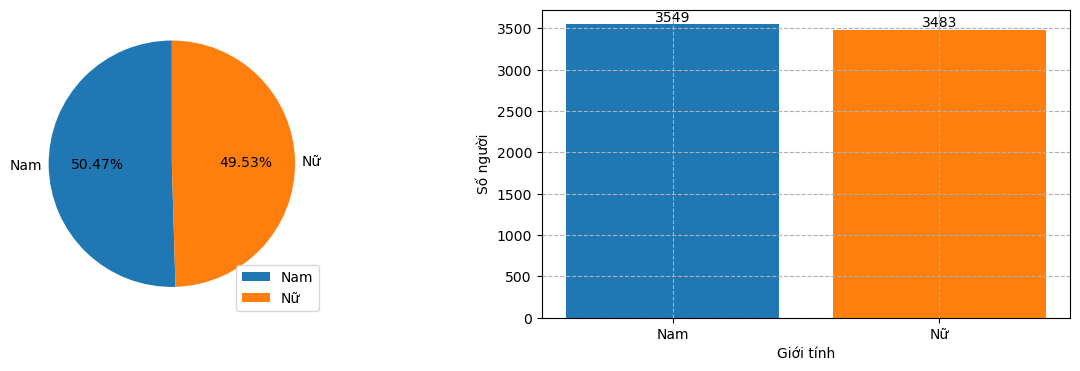

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_Gender.values,
    labels = data_Gender.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05,
)
plt.legend(loc=4)
plt.subplot(1,2,2)
bars = plt.bar(
    data_Gender.index,
    data_Gender.values,
    color=['#1f77b4', '#ff7f0e']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Giới tính')
plt.show()

**Nhận xét**
- Dữ liệu cho thấy tỷ lệ khách hàng nam và nữ gần như cân bằng (Nam: 3549, Nữ: 3483). Điều này cho thấy công ty đang phục vụ cả hai giới tính một cách công bằng.
- Không có sự chênh lệch lớn về giới tính, do đó chiến dịch marketing có thể nhắm đến cả nam và nữ mà không cần ưu tiên nhóm nào.

## nhóm liên quan về con người:

# Trực quan dữ liệu trong cột Senior Citizen(Khách hàng có là người cao tuổi hay không)

In [26]:
data['Người già'].value_counts()

Người già
Trẻ    5890
Già    1142
Name: count, dtype: int64

In [27]:
data_SeniorCitizen = data['Người già'].value_counts()

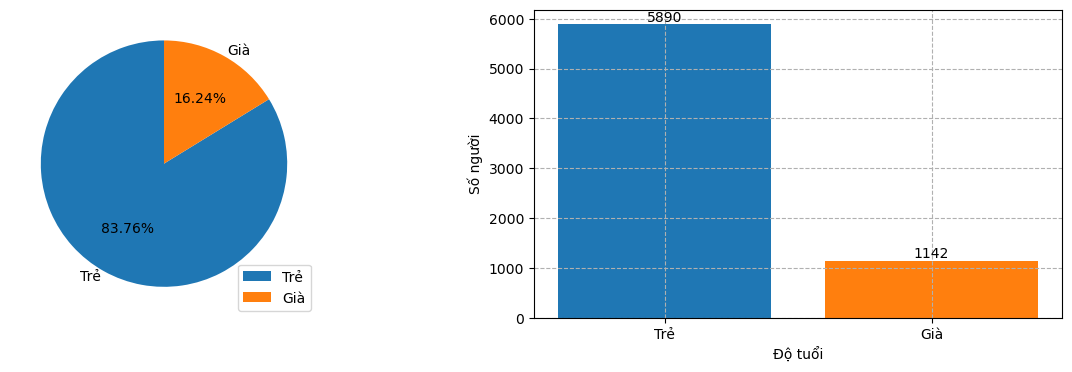

In [28]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_SeniorCitizen.values,
    labels = data_SeniorCitizen.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.legend(loc=4)
plt.subplot(1,2,2)
bars = plt.bar(
    data_SeniorCitizen.index,
    data_SeniorCitizen.values,
    color=['#1f77b4', '#ff7f0e']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Độ tuổi')
plt.show()

### Nhận xét

- Tổng số khách hàng: **7032**
  - Số lượng khách hàng **là người trẻ**: **5890 người (83.76%)**
  - Số lượng khách hàng **là người già**: **1142 người (16.42%)**
  - Số lượng khách hàng **là người trẻ gấp khoảng 5.1 lần** so với người cao tuổi.

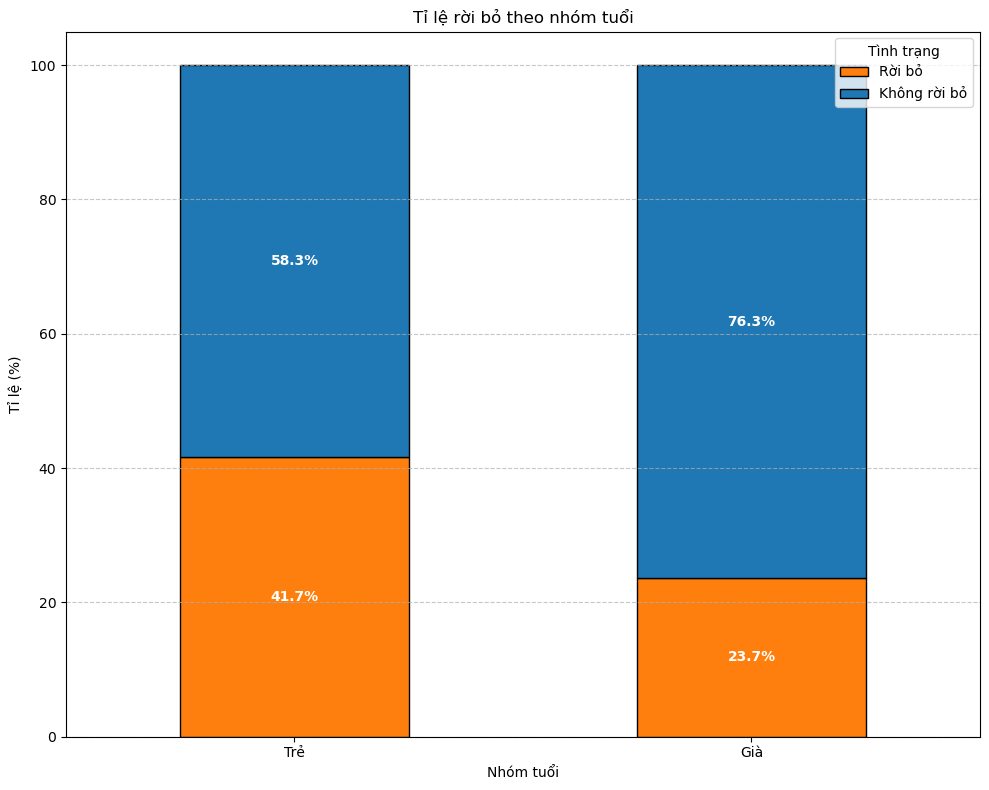

In [29]:
churn_rate = data.groupby("Người già")["Tình trạng khách hàng"].value_counts(normalize=True).unstack() * 100
churn_rate.index = ['Trẻ', 'Già']
#churn_rate = churn_rate[["Rời bỏ", "Không rời bỏ"]]  
churn_rate.columns = ["Rời bỏ", "Không rời bỏ"]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
ax = churn_rate.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=plt.gca()
)


for idx, (roi_bo, khong_roi_bo) in enumerate(zip(churn_rate["Rời bỏ"], churn_rate["Không rời bỏ"])):
    ax.text(idx, roi_bo / 2, f'{roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(idx, roi_bo + khong_roi_bo / 2, f'{khong_roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Thiết lập biểu đồ
plt.title('Tỉ lệ rời bỏ theo nhóm tuổi')
plt.ylabel('Tỉ lệ (%)')
plt.xlabel('Nhóm tuổi')
plt.xticks(rotation=0)
plt.legend(title='Tình trạng', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Nhận xét
- Tỷ lệ rời bỏ:
  - Khách hàng **là người trẻ**: **41.7%** → ≈ **2457 người rời bỏ**
  - Khách hàng **là người già**: **23.7%** → ≈ **271 người rời bỏ**

- **Nhận định quan trọng**:
  - Không chỉ chiếm số lượng đông, nhóm khách hàng trẻ còn có **tỷ lệ rời bỏ cao hơn gần gấp đôi** nhóm người cao tuổi.
  - Điều này cho thấy **người trẻ là nhóm khách hàng “rủi ro cao”**: họ dễ rời bỏ nếu không hài lòng với chất lượng, giá cả, hoặc bị thu hút bởi ưu đãi từ nhà mạng khác.

  - Nhóm khách hàng **không là người cao tuổi** (tức là người trẻ) lại có **tỷ lệ rời bỏ cao hơn**.
  - Người trẻ tuổi thường:
    - Có mức độ trung thành thấp hơn
    - Nhạy cảm với giá cả, tốc độ, tiện ích số
    - Thường xuyên so sánh và thử trải nghiệm nhà cung cấp khác
  - Ngược lại, người cao tuổi:
    - Có thói quen sử dụng ổn định, trung thành
    - Ít thay đổi dịch vụ nếu không gặp trở ngại lớn

---

### Giải pháp

#### Đối với khách hàng **không là người cao tuổi** (tức là người trẻ - tỷ lệ rời bỏ cao):
- **Chính sách giữ chân chủ động**: sử dụng hệ thống dự đoán churn để gửi ưu đãi kịp thời khi có dấu hiệu rời bỏ
- **Marketing cá nhân hóa**: phân tích hành vi, đề xuất gói cước phù hợp

#### Đối với khách hàng **là người cao tuổi**:
- **Duy trì chăm sóc truyền thống**: tổng đài thân thiện, dễ hiểu
- **Tri ân khách hàng lâu năm**: giảm giá, tăng tiện ích cho khách hàng trung thành
- **Hỗ trợ kỹ thuật rõ ràng**: dùng ngôn ngữ đơn giản, dễ thao tác với người lớn tuổi


# Trực quan dữ liệu trong cột Partner(Đối tác)

In [30]:
data['Đối tác'].value_counts()

Đối tác
Không là đối tác    3639
Là đối tác          3393
Name: count, dtype: int64

In [31]:
data_Partner = data['Đối tác'].value_counts()

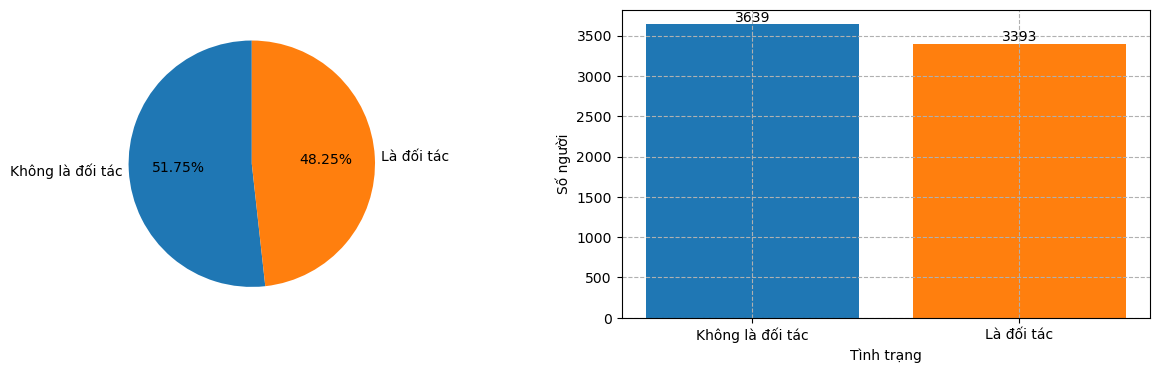

In [32]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_Partner.values,
    labels = data_Partner.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.subplot(1,2,2)
bars = plt.bar(
    data_Partner.index,
    data_Partner.values,
    color=['#1f77b4', '#ff7f0e']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Tình trạng')
plt.show()

### Nhận xét 

- Tổng số khách hàng: **7032**
  - Số lượng khách hàng **là đối tác**: **3393 người (48.25%)**
  - Số lượng khách hàng **không là đối tác**: **3639 người (51.75%)**
  - Hai nhóm gần như cân bằng về số lượng, tỷ lệ

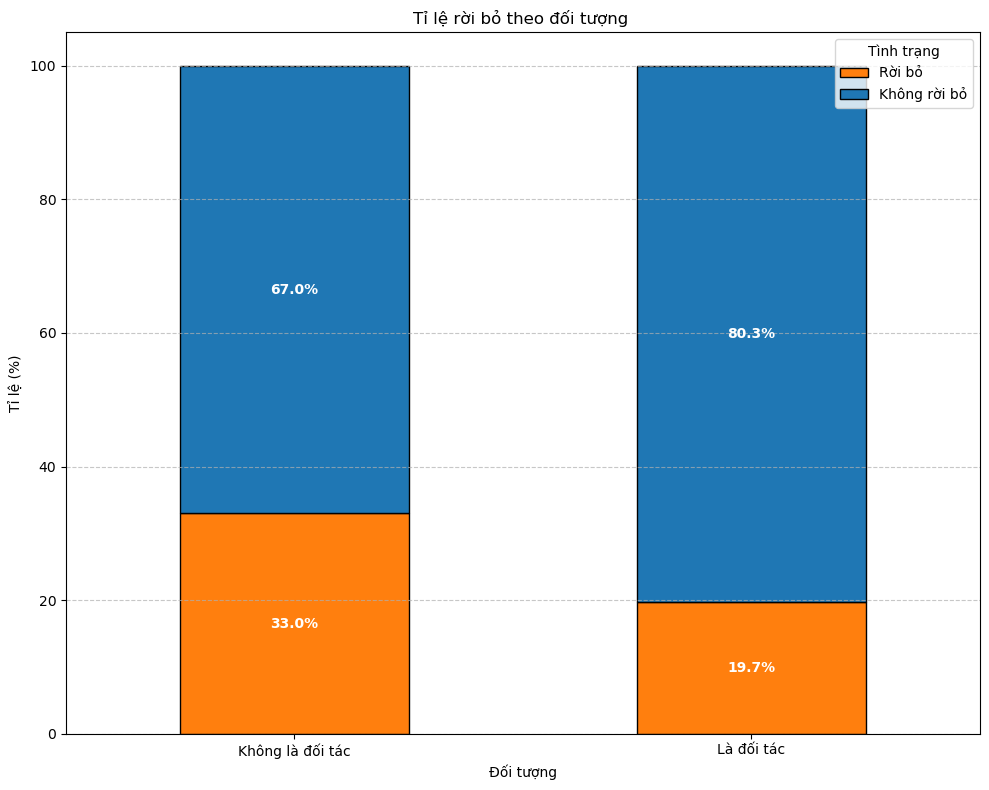

In [33]:
churn_rate = data.groupby("Đối tác")["Tình trạng khách hàng"].value_counts(normalize=True).unstack() * 100
churn_rate.index = ['Không là đối tác', 'Là đối tác']
churn_rate.columns = ["Rời bỏ", "Không rời bỏ"]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
ax = churn_rate.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=plt.gca()
)


for idx, (roi_bo, khong_roi_bo) in enumerate(zip(churn_rate["Rời bỏ"], churn_rate["Không rời bỏ"])):
    ax.text(idx, roi_bo / 2, f'{roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(idx, roi_bo + khong_roi_bo / 2, f'{khong_roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Thiết lập biểu đồ
plt.title('Tỉ lệ rời bỏ theo đối tượng ')
plt.ylabel('Tỉ lệ (%)')
plt.xlabel('Đối tượng')
plt.xticks(rotation=0)
plt.legend(title='Tình trạng', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Nhận xét 
- Tỷ lệ rời bỏ:
  - Khách hàng **là đối tác**: **33.0%** → ≈ **1120 người rời bỏ**
  - Khách hàng **không là đối tác**: **19.7%** → ≈ **717 người rời bỏ**

- **Nhận định quan trọng**:
  - Mặc dù hai nhóm gần như cân bằng về số lượng, tỷ lệ **khách hàng là đối tác rời bỏ cao hơn đáng kể** so với nhóm không là đối tác.
  - Thuộc tính **Partner** có ảnh hưởng rõ rệt đến khả năng rời bỏ.
  - Khách hàng **là đối tác** có tỷ lệ rời bỏ **cao hơn gần 1.7 lần** so với khách hàng **không là đối tác**.
  - Điều này cho thấy họ có thể là nhóm khách hàng **rủi ro cao**, cần được chú trọng theo dõi và giữ chân.

### Giải pháp

#### Đối với khách hàng **là đối tác** (tỷ lệ rời bỏ cao):
- Thiết kế **gói cước dành cho cặp đôi hoặc gia đình** (chia sẻ dịch vụ, giảm giá khi đăng ký cùng nhau).
- Tăng cường **chính sách giữ chân nhóm khách hàng hai người** bằng gói cước giá trị cao hoặc dịch vụ đi kèm

#### Đối với khách hàng **không là đối tác**:
- Duy trì chất lượng dịch vụ và tiếp tục phát triển các **gói cá nhân hóa**.
- Nhấn mạnh tính **độc lập, linh hoạt**, phù hợp.

## nhóm liêm quan đến dịch vụ

# Trực quan dữ liệu cột PhoneService(Khách hàng có sử dụng dịch vụ điện thoại hay không Yes or No)

In [34]:
data_PhoneService = data['Dịch vụ điện thoại'].value_counts()

In [35]:
data_PhoneService

Dịch vụ điện thoại
Sử dụng dịch vụ          6352
Không sử dụng dịch vụ     680
Name: count, dtype: int64

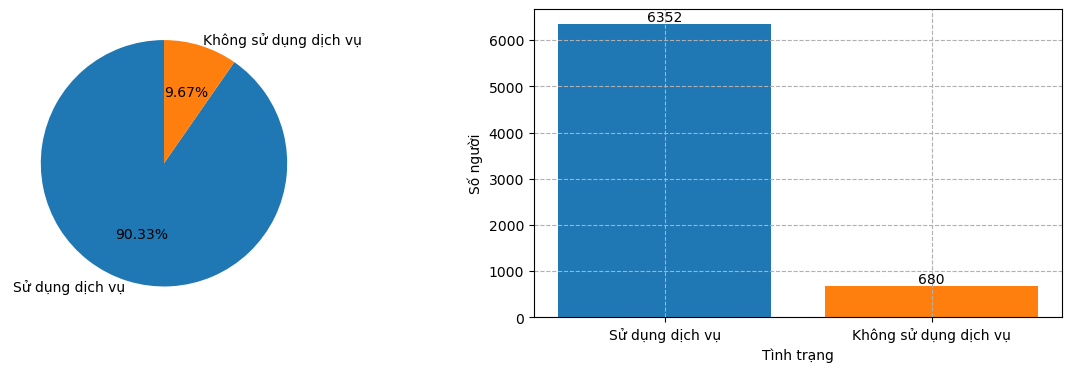

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.pie(
    data_PhoneService.values,
    labels = data_PhoneService.index,
    autopct='%.2f%%',
    startangle=90,
    labeldistance=1.05
)
plt.subplot(1,2,2)
bars = plt.bar(
    data_PhoneService.index,
    data_PhoneService.values,
    color=['#1f77b4', '#ff7f0e']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Tình trạng')
plt.show()

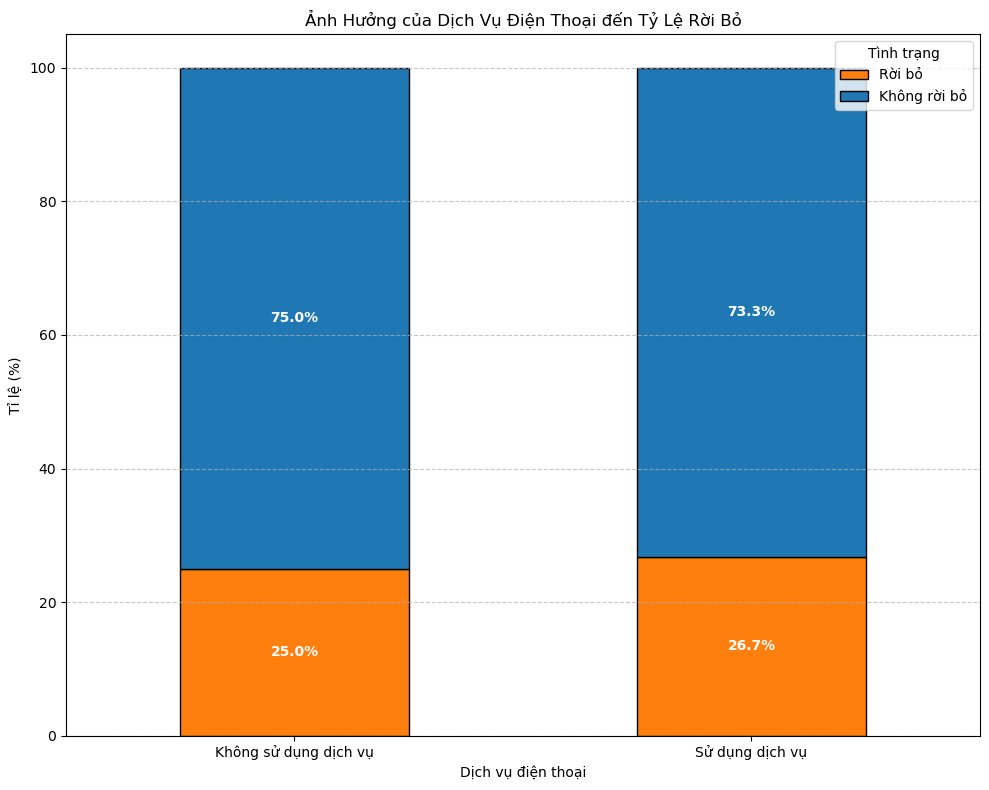

In [37]:
churn_rate = data.groupby("Dịch vụ điện thoại")["Tình trạng khách hàng"].value_counts(normalize=True).unstack() * 100
#churn_rate.index = ['Sử dụng dịch vụ', 'Không sử dụng dịch vụ']
#churn_rate = churn_rate[["Yes", "No"]]  
churn_rate.columns = ["Rời bỏ", "Không rời bỏ"]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
ax = churn_rate.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=plt.gca()
)


for idx, (roi_bo, khong_roi_bo) in enumerate(zip(churn_rate["Rời bỏ"], churn_rate["Không rời bỏ"])):
    ax.text(idx, roi_bo / 2, f'{roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(idx, roi_bo + khong_roi_bo / 2, f'{khong_roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Thiết lập biểu đồ
plt.title('Ảnh Hưởng của Dịch Vụ Điện Thoại đến Tỷ Lệ Rời Bỏ')
plt.ylabel('Tỉ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Tình trạng', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Nhận xét (Chi tiết)

- Tổng số khách hàng: **7032**
  - Số lượng khách hàng **sử dụng dịch vụ điện thoại**: **6352 người**
  - Số lượng khách hàng **không sử dụng dịch vụ điện thoại**: **680 người**

- Tỷ lệ rời bỏ:
  - Khách hàng **sử dụng dịch vụ điện thoại**: **26.7%** → ≈ **1691 người rời bỏ**
  - Khách hàng **không sử dụng dịch vụ điện thoại**: **25.0%** → ≈ **170 người rời bỏ**

- Nhận định quan trọng:
  - Tỷ lệ rời bỏ giữa hai nhóm **sử dụng dịch vụ điện thoại** và **không sử dụng dịch vụ điện thoại** khá tương đồng, với sự chênh lệch không đáng kể (1.7%).
  - Tuy nhiên, nhóm **sử dụng dịch vụ điện thoại** chiếm số lượng lớn hơn nhiều, điều này có thể khiến tổng số khách hàng rời bỏ của nhóm này cao hơn so với nhóm **không sử dụng dịch vụ điện thoại**.

### Ảnh hưởng

- Thuộc tính **PhoneService** không có sự khác biệt quá lớn về tỷ lệ rời bỏ giữa hai nhóm.
- Điều này cho thấy rằng **dịch vụ điện thoại có thể không phải yếu tố chính quyết định việc khách hàng rời bỏ dịch vụ**, mà có thể còn bị ảnh hưởng bởi các yếu tố khác như giá trị tổng thể của gói cước hoặc các dịch vụ đi kèm.

### Giải pháp

#### Đối với khách hàng **sử dụng dịch vụ điện thoại**:
- Tăng cường **chất lượng dịch vụ điện thoại**, đảm bảo kết nối ổn định, ít gián đoạn.
- Cung cấp **gói cước hấp dẫn**, khuyến mãi hoặc ưu đãi cho khách hàng sử dụng dịch vụ lâu dài.

#### Đối với khách hàng **không sử dụng dịch vụ điện thoại**:
- Cải thiện các **gói dịch vụ tích hợp**, kết hợp điện thoại với các dịch vụ khác để khuyến khích khách hàng sử dụng dịch vụ điện thoại.
- **Marketing nhắm đến khách hàng tiềm năng** để khuyến khích họ sử dụng dịch vụ điện thoại, như các gói ưu đãi hoặc thử nghiệm miễn phí.


# Trực quan dữ liệu trong cột Contract(Thời hạn hợp đồng của khách hàng)

In [38]:
data_Contract = data['Loại hợp đồng'].value_counts()

In [39]:
data_Contract

Loại hợp đồng
Từng tháng    3875
Hai năm       1685
Từng năm      1472
Name: count, dtype: int64

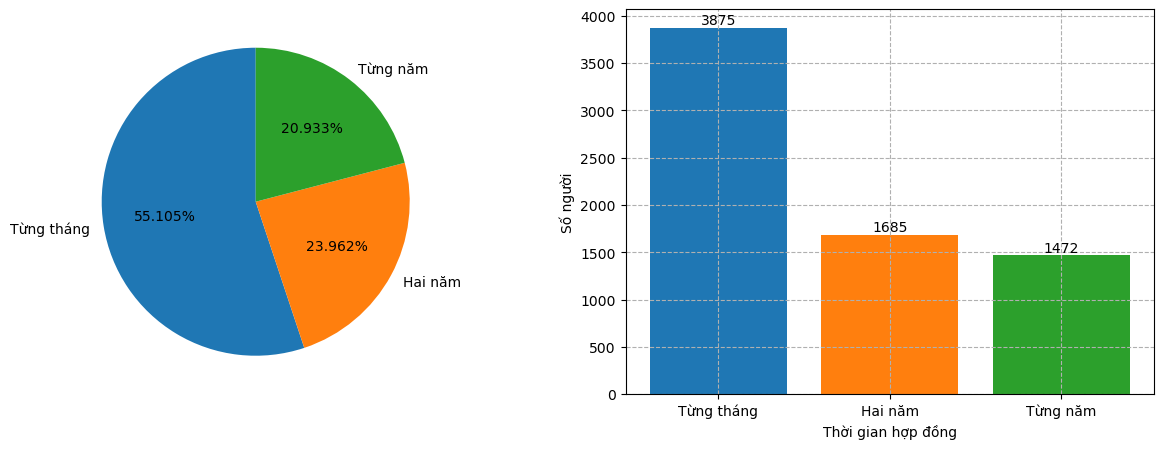

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(
    data_Contract.values,
    labels=data_Contract.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.subplot(1,2,2)
bars = plt.bar(
    data_Contract.index,
    data_Contract.values,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xlabel('Thời gian hợp đồng')
plt.show()

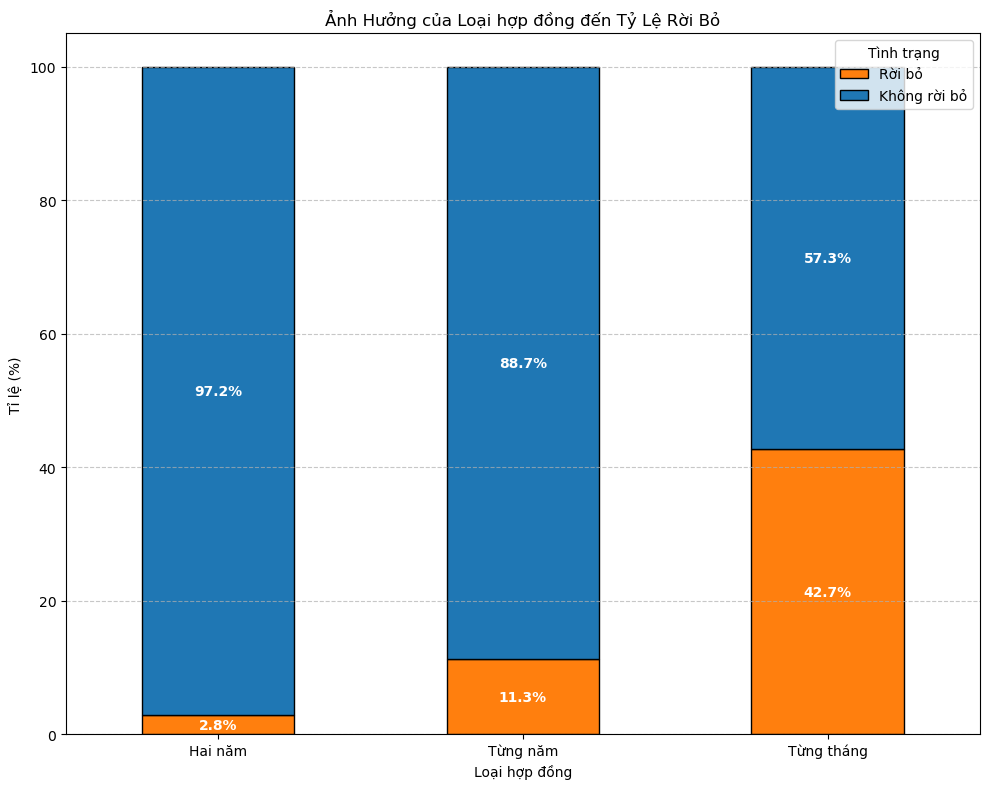

In [41]:
churn_rate = data.groupby("Loại hợp đồng")["Tình trạng khách hàng"].value_counts(normalize=True).unstack() * 100
#churn_rate.index = ['Sử dụng dịch vụ', 'Không sử dụng dịch vụ']
#churn_rate = churn_rate[["Yes", "No"]]  
churn_rate.columns = ["Rời bỏ", "Không rời bỏ"]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
ax = churn_rate.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=plt.gca()
)


for idx, (roi_bo, khong_roi_bo) in enumerate(zip(churn_rate["Rời bỏ"], churn_rate["Không rời bỏ"])):
    ax.text(idx, roi_bo / 2, f'{roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(idx, roi_bo + khong_roi_bo / 2, f'{khong_roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Thiết lập biểu đồ
plt.title('Ảnh Hưởng của Loại hợp đồng đến Tỷ Lệ Rời Bỏ')
plt.ylabel('Tỉ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Tình trạng', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét

- Tổng số khách hàng: **7032**
  - Số lượng khách hàng **thời hạn hợp đồng từng tháng**: **3875 người**
  - Số lượng khách hàng **thời hạn hợp đồng hai năm**: **1685 người**
  - Số lượng khách hàng **thời hạn hợp đồng từng năm**: **1472 người**

- Tỷ lệ rời bỏ:
  - Khách hàng **thời hạn hợp đồng từng tháng**: **42.7%** → ≈ **1650 người rời bỏ**
  - Khách hàng **thời hạn hợp đồng hai năm**: **2.8%** → ≈ **47 người rời bỏ**
  - Khách hàng **thời hạn hợp đồng từng năm**: **11.3%** → ≈ **166 người rời bỏ**

- Nhận định quan trọng:
  - **Khách hàng có hợp đồng từng tháng** có tỷ lệ rời bỏ rất cao (42.7%) so với các nhóm khác, chứng tỏ họ là nhóm khách hàng **rủi ro cao** về khả năng rời bỏ dịch vụ.
  - Khách hàng có hợp đồng **hai năm** có tỷ lệ rời bỏ thấp nhất (2.8%), cho thấy họ có xu hướng trung thành cao hơn và ít thay đổi nhà cung cấp dịch vụ.
  - **Khách hàng có hợp đồng từng năm** có tỷ lệ rời bỏ trung bình (11.3%), cao hơn nhóm hợp đồng hai năm nhưng thấp hơn nhóm hợp đồng từng tháng.

### Ảnh hưởng

- Thuộc tính **Contract** có ảnh hưởng mạnh đến khả năng rời bỏ dịch vụ.
- **Khách hàng có hợp đồng từng tháng** có tỷ lệ rời bỏ **cao hơn nhiều so với các nhóm khác**, có thể vì họ cảm thấy dễ dàng thay đổi nhà cung cấp và không bị ràng buộc lâu dài.
- **Khách hàng có hợp đồng hai năm** ít rời bỏ dịch vụ, vì họ có sự cam kết lâu dài và có thể nhận được các ưu đãi giá trị.
- **Khách hàng có hợp đồng từng năm** có tỷ lệ rời bỏ ở mức trung bình, cho thấy họ ít cam kết hơn khách hàng hai năm nhưng vẫn gắn bó hơn nhóm hợp đồng từng tháng.

### Giải pháp

- Đối với khách hàng **hợp đồng từng tháng** (tỷ lệ rời bỏ cao):
  - Cung cấp các **ưu đãi lâu dài** cho khách hàng ký hợp đồng dài hạn, ví dụ như giảm giá khi chuyển sang hợp đồng hai năm.
  - Tăng cường **chính sách giữ chân** cho khách hàng có hợp đồng ngắn hạn, như cung cấp các gói dịch vụ đặc biệt hoặc tích lũy điểm thưởng.

- Đối với khách hàng **hợp đồng hai năm** (tỷ lệ rời bỏ thấp):
  - Duy trì **chất lượng dịch vụ ổn định** và cung cấp các **ưu đãi tri ân** cho khách hàng có hợp đồng dài hạn, như quà tặng, giảm giá cước cho các năm tiếp theo.
  - **Khuyến khích gia hạn hợp đồng** sớm với các ưu đãi đặc biệt cho khách hàng trung thành.

- Đối với khách hàng **hợp đồng từng năm**:
  - Tạo ra các **chương trình chuyển đổi** hấp dẫn để khách hàng chuyển sang hợp đồng dài hạn hơn, với những ưu đãi như giảm giá cước hoặc dịch vụ bổ sung.
  - Tiếp tục duy trì **chất lượng dịch vụ** và các **gói khuyến mãi** phù hợp để giữ chân nhóm khách hàng này.


# Trực quan dữ liệu trong cột Tenure( Thời gian khách hàng đã sử dụng dịch vụ của công ty)

In [42]:
data_Tenure = data['Số tháng gắn bó'].value_counts()

In [43]:
data_Tenure.sort_index()

Số tháng gắn bó
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 72, dtype: int64

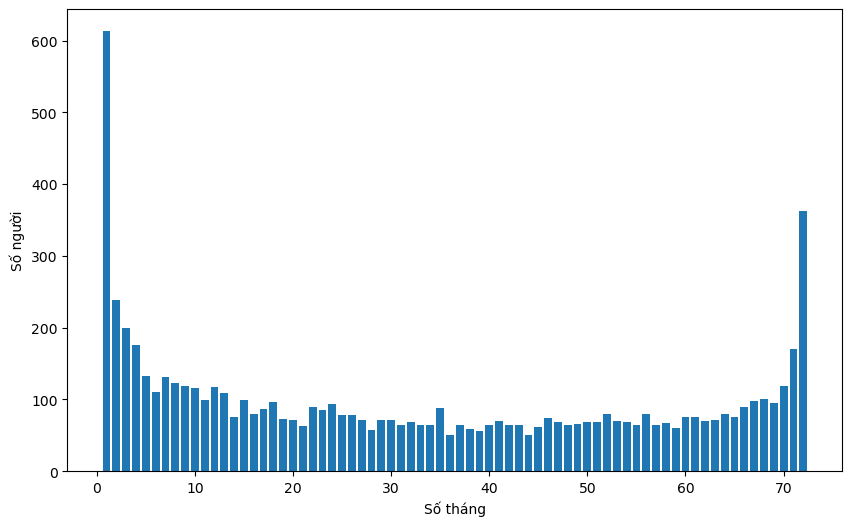

In [44]:
plt.figure(figsize=(10,6))
plt.bar(
    data_Tenure.index,
    data_Tenure.values,
)
plt.ylabel('Số người')
plt.xlabel('Số tháng')
plt.show()

C:\Users\vuhoa\AppData\Local\Temp\ipykernel_2060\145378259.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = data.groupby('Khoảng chia theo số tháng')['Tình trạng khách hàng'].value_counts(normalize=True).unstack().fillna(0) * 100


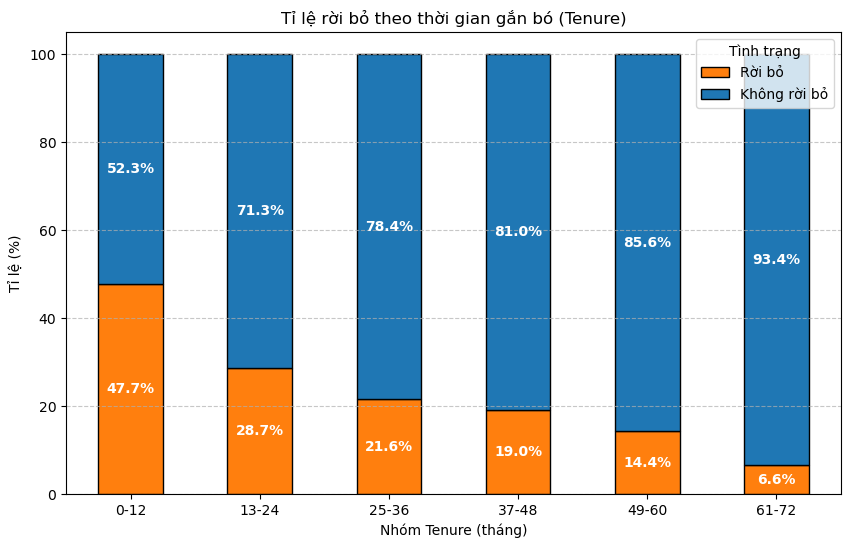

In [45]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
data['Khoảng chia theo số tháng'] = pd.cut(data['Số tháng gắn bó'], bins=bins, labels=labels, right=True)

# Tính tỉ lệ rời bỏ theo nhóm Tenure
churn_by_tenure = data.groupby('Khoảng chia theo số tháng')['Tình trạng khách hàng'].value_counts(normalize=True).unstack().fillna(0) * 100
churn_by_tenure = churn_by_tenure.reindex(labels)
# Vẽ stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = churn_by_tenure.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=ax
)

# Thêm nhãn phần trăm vào giữa cột
for i in range(len(churn_by_tenure)):
    yes_pct = churn_by_tenure.iloc[i]["Đã rời bỏ"]
    no_pct = churn_by_tenure.iloc[i]["Ở lại"]
    ax.text(i, yes_pct / 2, f'{yes_pct:.1f}%', ha='center', va='center', color='white', fontweight='bold')
    ax.text(i, yes_pct + no_pct / 2, f'{no_pct:.1f}%', ha='center', va='center', color='white', fontweight='bold')

ax.set_title('Tỉ lệ rời bỏ theo thời gian gắn bó (Tenure)')
ax.set_xlabel('Nhóm Tenure (tháng)')
ax.set_ylabel('Tỉ lệ (%)')
ax.set_xticklabels(labels, rotation=0)
ax.legend(title='Tình trạng', labels=['Rời bỏ', 'Không rời bỏ'])
ax.grid(axis='y', linestyle='--', alpha=0.7);

### Nhận xét

- Trong toàn bộ dữ liệu, hai mốc thời gian có số lượng khách hàng cao nhất là:
  - **1 tháng**: có **613 khách hàng** – cho thấy nhiều khách hàng mới đăng ký dịch vụ.
  - **72 tháng**: có **362 khách hàng** – phản ánh một nhóm khách hàng trung thành lâu năm.

- Ở các khoảng thời gian còn lại (từ tháng 2 đến tháng 71), số lượng khách hàng tương đối đồng đều, dao động trong khoảng **90 đến 133 khách hàng** mỗi tháng.

- Khi phân chia thời gian sử dụng thành các nhóm theo **chu kỳ 12 tháng**, tỷ lệ rời bỏ giảm dần theo thời gian gắn bó:
  - **0–12 tháng**: tỷ lệ rời bỏ **47.7%**
  - **13–24 tháng**: **28.7%**
  - **25–36 tháng**: **21.6%**
  - **37–48 tháng**: **19.0%**
  - **49–60 tháng**: **14.4%**
  - **61–72 tháng**: **6.6%**

- Điều này cho thấy **khách hàng càng gắn bó lâu dài thì khả năng rời bỏ càng thấp**, ngược lại, **khách hàng mới là nhóm có rủi ro cao nhất**.

### Ảnh hưởng

- Thuộc tính **`tenure`** có tác động rõ rệt đến hành vi rời bỏ:
  - Khách hàng mới (0–12 tháng) có tỷ lệ rời bỏ gần **50%**, cho thấy **giai đoạn đầu là giai đoạn dễ mất khách nhất**.
  - Tỷ lệ rời bỏ **giảm dần theo thời gian**, chứng minh rằng **sự gắn bó lâu dài làm tăng mức độ trung thành**.

- Việc giữ chân khách hàng trong năm đầu tiên là yếu tố then chốt ảnh hưởng đến tổng tỷ lệ rời bỏ chung của công ty.

### Giải pháp

#### Đối với khách hàng mới (0–12 tháng):

- Tăng cường **chương trình chào mừng, hướng dẫn sử dụng dịch vụ rõ ràng**.
- Thiết lập **gói khuyến mãi thử nghiệm** hoặc ưu đãi giá trong 3–6 tháng đầu tiên.
- Tăng tương tác chủ động như **gọi điện khảo sát sớm**, chăm sóc cá nhân trong tháng đầu tiên.
- Cảnh báo sớm hành vi có khả năng rời bỏ (giảm sử dụng, khiếu nại, hủy dịch vụ nhỏ).

#### Đối với khách hàng trung thành (trên 24 tháng):

- Tăng **các chương trình tri ân**, giảm giá cho khách hàng lâu năm.
- Tạo **gói dịch vụ nâng cấp phù hợp**, giữ sự hứng thú với dịch vụ.
- Đảm bảo **dịch vụ ổn định, hỗ trợ kỹ thuật tốt** để duy trì trải nghiệm tích cực.

#### Nhìn chung:

- Tăng tỷ lệ giữ chân trong 12 tháng đầu tiên là yếu tố **ưu tiên chiến lược** vì ảnh hưởng lớn đến tỷ lệ rời bỏ tổng thế tổng thể.


# Trực quan dữ liệu trong cột InternetService( Khách hàng sử dụng những dịch vụ cung cấp Internet nào)

In [61]:
data_InternetService = data['Dịch vụ internet'].value_counts()

In [62]:
data_InternetService

Dịch vụ internet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

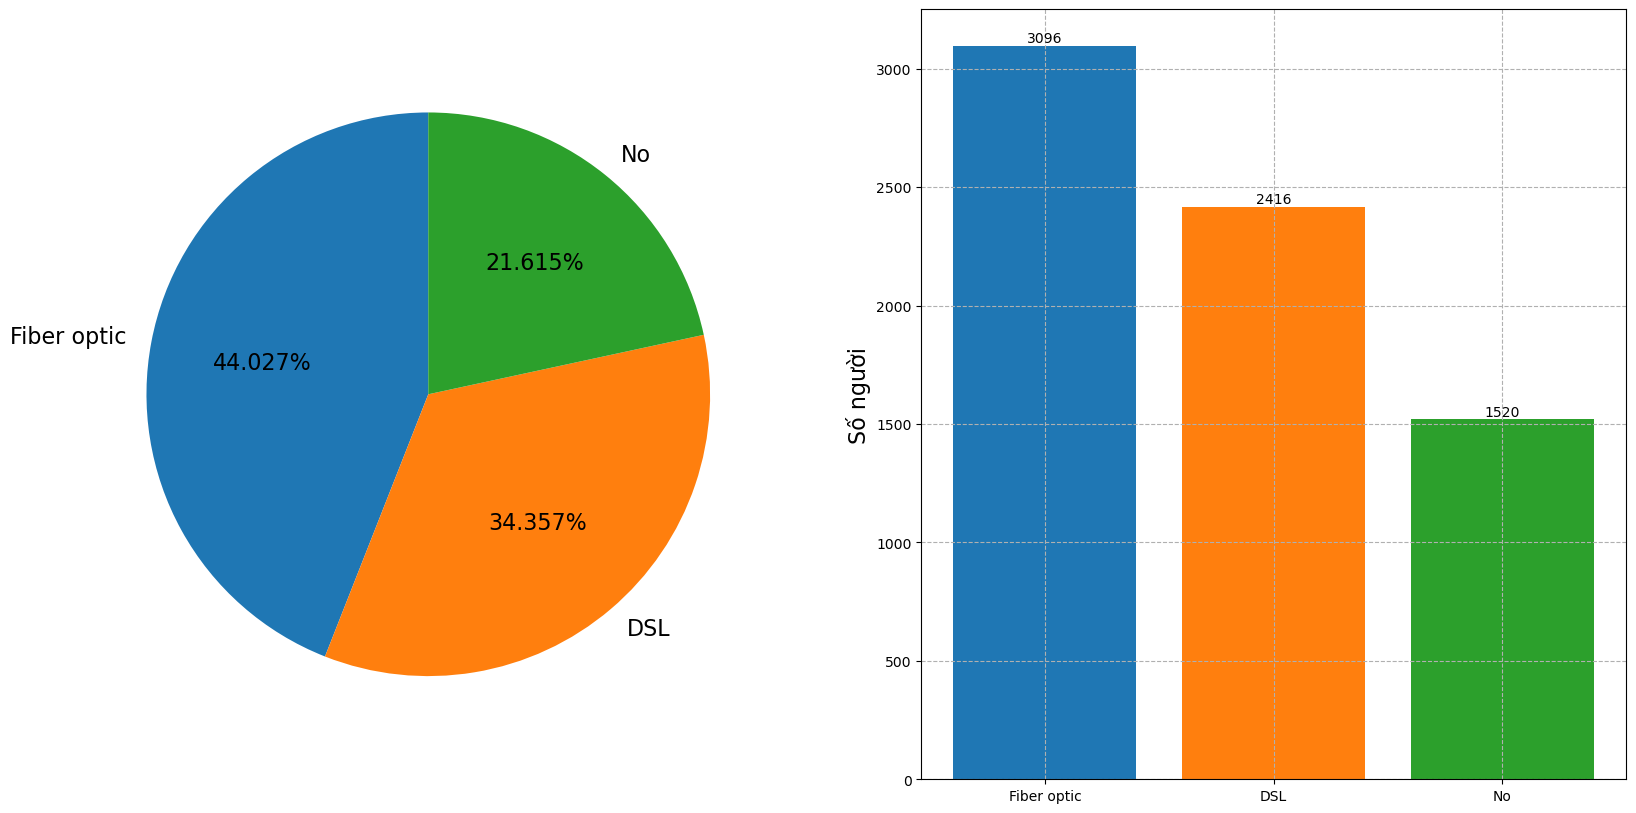

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(
    data_InternetService.values,
    labels = data_InternetService.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09,
    textprops={'fontsize': 16}
)

plt.subplot(1,2,2)
bars = plt.bar(
    data_InternetService.index,
    data_InternetService.values,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls='--')
plt.ylabel('Số người',fontsize=16)
#plt.xlabel('Sử dụng dịch vụ')
plt.show()

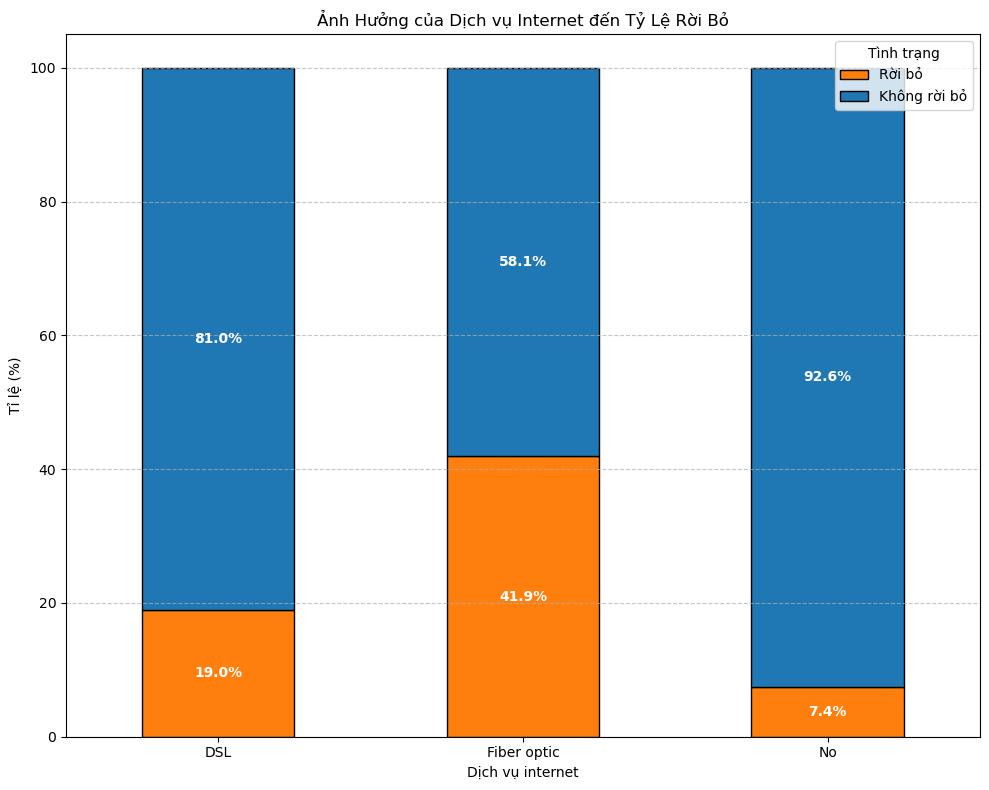

In [71]:
churn_rate = data.groupby("Dịch vụ internet")["Tình trạng khách hàng"].value_counts(normalize=True).unstack() * 100
#churn_rate.index = ['Sử dụng dịch vụ', 'Không sử dụng dịch vụ']
#churn_rate = churn_rate[["Yes", "No"]]  
churn_rate.columns = ["Rời bỏ", "Không rời bỏ"]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
ax = churn_rate.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=plt.gca()
)


for idx, (roi_bo, khong_roi_bo) in enumerate(zip(churn_rate["Rời bỏ"], churn_rate["Không rời bỏ"])):
    ax.text(idx, roi_bo / 2, f'{roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(idx, roi_bo + khong_roi_bo / 2, f'{khong_roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Thiết lập biểu đồ
plt.title('Ảnh Hưởng của Dịch vụ Internet đến Tỷ Lệ Rời Bỏ')
plt.ylabel('Tỉ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Tình trạng', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét

- Tổng số khách hàng: **7032**
  - Số lượng khách hàng **không sử dụng dịch vụ đa luồng**: **3385 người**
  - Số lượng khách hàng **sử dụng dịch vụ đa luồng**: **2967 người**
  - Số lượng khách hàng **không sử dụng dịch vụ điện thoại**: **680 người**

- Tỷ lệ rời bỏ:
  - Khách hàng **không sử dụng dịch vụ đa luồng**: **25.1%** → ≈ **851 người rời bỏ**
  - Khách hàng **sử dụng dịch vụ đa luồng**: **28.6%** → ≈ **849 người rời bỏ**
  - Khách hàng **không sử dụng dịch vụ điện thoại**: **25.0%** → ≈ **170 người rời bỏ**

- Nhận định quan trọng:
  - Tỷ lệ rời bỏ giữa nhóm **không sử dụng dịch vụ đa luồng** và **sử dụng dịch vụ đa luồng** khá tương đương, với sự chênh lệch nhỏ (3.5%).
  - Điều này cho thấy rằng việc sử dụng dịch vụ đa luồng không ảnh hưởng lớn đến khả năng rời bỏ của khách hàng, mà có thể có các yếu tố khác như chất lượng dịch vụ tổng thể hoặc gói cước mà họ đang sử dụng.

### Ảnh hưởng

- Thuộc tính **MultipleLines** có ảnh hưởng không quá lớn đến tỷ lệ rời bỏ dịch vụ.
- **Khách hàng sử dụng dịch vụ đa luồng** có tỷ lệ rời bỏ chỉ cao hơn một chút so với nhóm **không sử dụng dịch vụ đa luồng**, cho thấy **dịch vụ đa luồng không phải yếu tố quyết định chính** đến việc rời bỏ dịch vụ.

### Giải pháp

- Đối với khách hàng **sử dụng dịch vụ đa luồng**:
    - **Cải thiện chất lượng kết nối đa luồng**, tăng tốc độ truyền tải và giảm gián đoạn dịch vụ để giữ chân khách hàng.
    - Cung cấp **gói cước linh hoạt** và giảm giá khi khách hàng sử dụng nhiều dịch vụ cùng lúc.

- Đối với khách hàng **không sử dụng dịch vụ đa luồng**:
    - Khuyến khích **sử dụng dịch vụ đa luồng** qua các ưu đãi, gói khuyến mãi hoặc dịch vụ bổ sung hấp dẫn.
    - Tiếp tục phát triển các **gói dịch vụ đơn giản**, đặc biệt cho những khách hàng không có nhu cầu sử dụng nhiều dịch vụ cùng lúc, nhưng vẫn đảm bảo chất lượng dịch vụ tốt.


## nhóm liên quan đến thanh toán

# Trực quan hóa dữ liệu cột PaymenMethod(Phương thức thanh toán của khách hàng)

In [50]:
data_PaymenMethod = data['Phương thức thanh toán'].value_counts()

In [51]:
data_PaymenMethod

Phương thức thanh toán
Hóa đơn điện tử                    2365
Gửi qua bưu điện                   1604
Tự động qua giao dịch ngân hàng    1542
Tự động qua thẻ tín dụng           1521
Name: count, dtype: int64

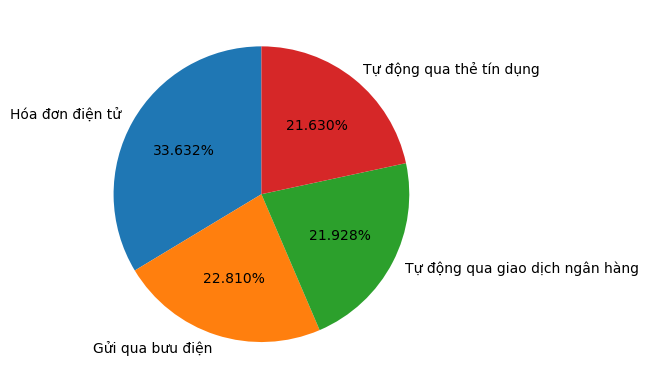

In [72]:
plt.pie(
    data_PaymenMethod.values,
    labels = data_PaymenMethod.index,
    autopct='%.3f%%',
    startangle=90,
    labeldistance=1.09
)    
plt.show()

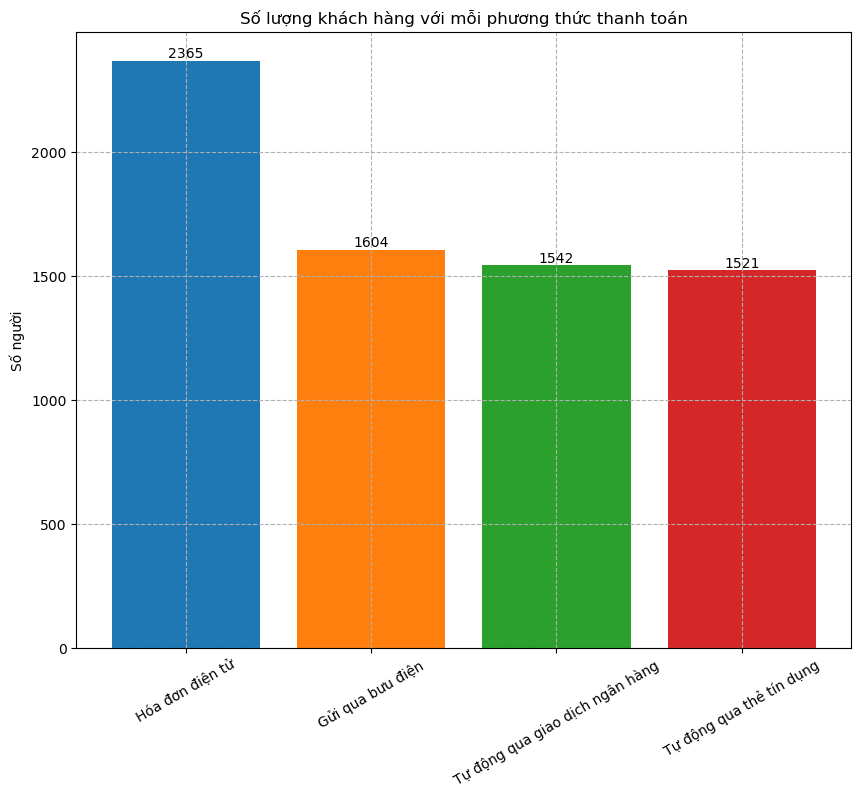

In [53]:
plt.figure(figsize=(10,8))
bars = plt.bar(
    data_PaymenMethod.index,
    data_PaymenMethod.values,
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.title('Số lượng khách hàng với mỗi phương thức thanh toán')
plt.grid(ls='--')
plt.ylabel('Số người')
plt.xticks(rotation = 30);

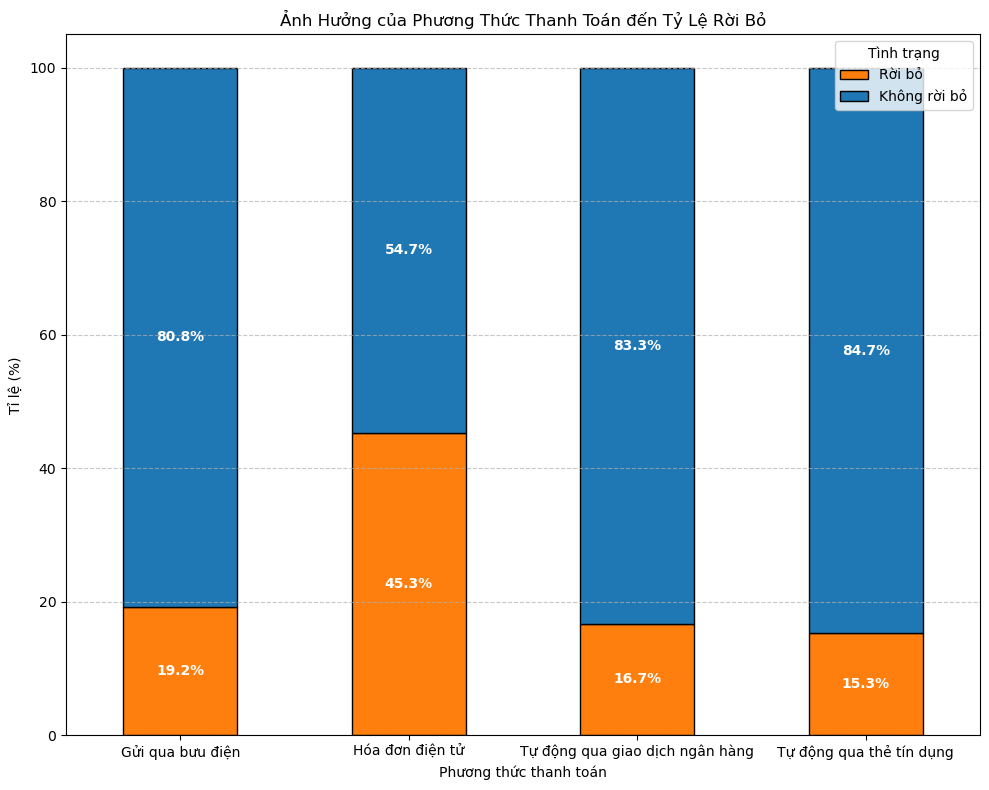

In [54]:
churn_rate = data.groupby("Phương thức thanh toán")["Tình trạng khách hàng"].value_counts(normalize=True).unstack() * 100
#churn_rate.index = ['Sử dụng dịch vụ', 'Không sử dụng dịch vụ']
#churn_rate = churn_rate[["Yes", "No"]]  
churn_rate.columns = ["Rời bỏ", "Không rời bỏ"]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
ax = churn_rate.plot(
    kind='bar',
    stacked=True,
    color=['#ff7f0e', '#1f77b4'],
    edgecolor='black',
    ax=plt.gca()
)


for idx, (roi_bo, khong_roi_bo) in enumerate(zip(churn_rate["Rời bỏ"], churn_rate["Không rời bỏ"])):
    ax.text(idx, roi_bo / 2, f'{roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(idx, roi_bo + khong_roi_bo / 2, f'{khong_roi_bo:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Thiết lập biểu đồ
plt.title('Ảnh Hưởng của Phương Thức Thanh Toán đến Tỷ Lệ Rời Bỏ')
plt.ylabel('Tỉ lệ (%)')
plt.xticks(rotation=0)
plt.legend(title='Tình trạng', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét

- Tổng số khách hàng: **7032**
  - Khách hàng thanh toán qua **hóa đơn điện tử**: **2365 người (33.6%)**
  - Khách hàng thanh toán bằng **gửi hóa đơn qua bưu điện**: **1604 người (22.8%)**
  - Khách hàng **tự động thanh toán qua giao dịch ngân hàng**: **1542 người (21.9%)**
  - Khách hàng **tự động thanh toán qua thẻ tín dụng**: **1521 người (21.6%)**

- Tỷ lệ rời bỏ:
  - **Hóa đơn điện tử**: **45.3%** → ≈ **1071 người rời bỏ**
  - **Gửi qua bưu điện**: **19.2%** → ≈ **308 người rời bỏ**
  - **Tự động qua giao dịch ngân hàng**: **16.7%** → ≈ **257 người rời bỏ**
  - **Tự động qua thẻ tín dụng**: **15.3%** → ≈ **233 người rời bỏ**

- Nhận định quan trọng:
  - Nhóm khách hàng **thanh toán bằng hóa đơn điện tử có tỷ lệ rời bỏ cao nhất**, cao hơn gấp **3 lần** so với nhóm dùng thanh toán tự động qua ngân hàng hoặc thẻ tín dụng.
  - Ngược lại, nhóm **tự động thanh toán** có tỷ lệ rời bỏ thấp nhất, cho thấy sự tiện lợi và ổn định có thể làm tăng mức độ gắn bó của khách hàng.
  - Khách hàng **dùng hóa đơn điện tử** có thể chủ động nhưng cũng dễ thay đổi khi không hài lòng.

### Ảnh hưởng

- Thuộc tính **PaymentMethod** có ảnh hưởng rõ rệt đến tỷ lệ rời bỏ.
- Những **phương thức thủ công hoặc không định kỳ** như **hóa đơn điện tử** dễ dẫn đến rời bỏ cao hơn do khách hàng thường xuyên tiếp xúc với hóa đơn, dễ so sánh, dễ dừng dịch vụ.
- Trong khi đó, **phương thức thanh toán tự động** cho thấy **tác động tích cực tới sự giữ chân khách hàng**.

### Giải pháp

- 1. Đối với khách hàng sử dụng **hóa đơn điện tử** (tỷ lệ rời bỏ cao nhất – 45.3%):
    - **Khuyến khích chuyển đổi sang thanh toán tự động**:
        - Tặng **ưu đãi giảm giá 1–3 tháng** khi khách hàng đăng ký thanh toán tự động qua ngân hàng hoặc thẻ tín dụng.
        - Gửi thông báo **so sánh lợi ích cụ thể** giữa hóa đơn điện tử và phương thức tự động.
    - **Cải thiện trải nghiệm hóa đơn điện tử**:
        - Tối ưu giao diện thanh toán trên website/app để dễ sử dụng.
        - Minh bạch hóa phí dịch vụ, cước sử dụng trong hóa đơn.
        - Gửi thông báo hóa đơn định kỳ đúng hạn, có hướng dẫn thanh toán nhanh.

- 2. Đối với khách hàng **gửi hóa đơn qua bưu điện** (tỷ lệ rời bỏ trung bình – 19.2%):
    - **Khuyến khích chuyển đổi sang hình thức điện tử hoặc tự động**:
        - Giới thiệu tiện ích, sự nhanh chóng của hóa đơn điện tử hoặc thanh toán tự động.
        - Có thể tặng **ưu đãi chuyển đổi** (tặng dung lượng data, giảm phí lắp đặt...).
    - **Duy trì hỗ trợ truyền thống**:
        - Với khách hàng cao tuổi, nên tiếp tục cung cấp **dịch vụ hỗ trợ qua tổng đài, bưu điện** nếu họ chưa sẵn sàng chuyển đổi.

- 3. Đối với khách hàng **tự động qua giao dịch ngân hàng** (tỷ lệ rời bỏ thấp – 16.7%):
    - **Duy trì sự hài lòng và gắn bó**:
        - Cung cấp **thông báo xác nhận giao dịch định kỳ**, đảm bảo tính minh bạch.
        - Thiết lập hệ thống **cảnh báo lỗi thanh toán** (ví dụ tài khoản không đủ tiền) để tránh gián đoạn dịch vụ.
    - **Tri ân nhóm khách hàng trung thành**:
    - Ưu đãi sinh nhật, tích điểm đổi quà, nâng cấp băng thông miễn phí.

- 4. Đối với khách hàng **tự động qua thẻ tín dụng** (tỷ lệ rời bỏ thấp nhất – 15.3%):
    - **Củng cố trải nghiệm liền mạch**:
        - Đảm bảo **tính bảo mật cao** trong khâu thanh toán.
        - Cho phép quản lý thông tin thẻ dễ dàng qua app.
    - **Khuyến khích tiếp tục sử dụng lâu dài**:
        - Tạo các chương trình **“hoàn tiền cước” hoặc tích điểm khi thanh toán bằng thẻ**.
        - Kết hợp với ngân hàng phát hành thẻ để tạo các combo ưu đãi (giảm cước, tặng quà...).




# Trực quan hóa dữ liệu cột MonthlyCharges(Chi phí hàng tháng thanh toán của khách hàng)

In [55]:
data_MonthlyCharges = data['Phí hàng tháng'].value_counts()
data['Phí hàng tháng'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: Phí hàng tháng, dtype: float64

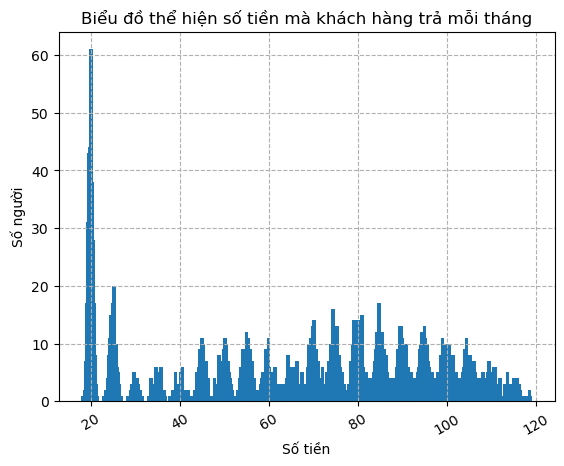

In [56]:
plt.title('Biểu đồ thể hiện số tiền mà khách hàng trả mỗi tháng')
plt.bar(
    data_MonthlyCharges.index,
    data_MonthlyCharges.values,
)
plt.grid(ls='--')
plt.xlabel('Số tiền')
plt.ylabel('Số người')
plt.xticks(rotation = 30)
plt.show()

#### Nhận xét:
- Biểu đồ cho thấy phần lớn khách hàng có mức **phí hàng tháng dao động từ khoảng 20 đến 80**.
- Một số mức phí có số lượng khách hàng tăng đột biến, có thể là các gói dịch vụ phổ biến.
- Dữ liệu có xu hướng lệch phải, tức là có một số khách hàng trả mức phí cao vượt trội so với phần lớn còn lại.

#### Giải pháp:
- Do mức phí ảnh hưởng lớn đến hành vi khách hàng, doanh nghiệp nên:
  - **Đánh giá lại các gói dịch vụ cao cấp** có mức phí lớn để đảm bảo tương xứng với giá trị cung cấp.
  - **Cải tiến các gói dịch vụ phổ biến** nhằm nâng cao trải nghiệm và giữ chân khách hàng.
  - **Tối ưu chính sách khuyến mãi/ưu đãi** cho nhóm khách hàng ở mức phí trung bình (đang chiếm số lượng lớn).

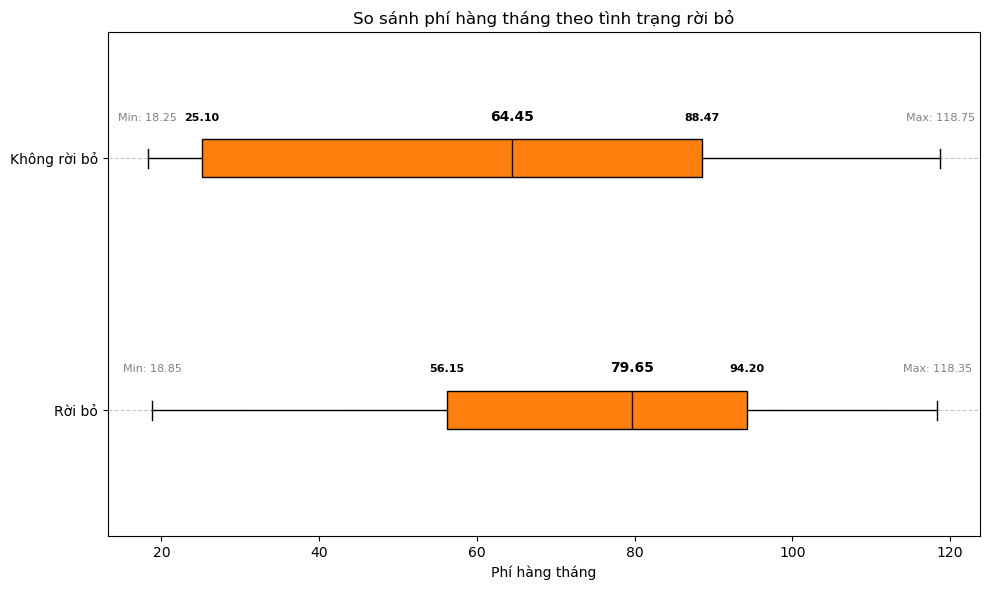

In [58]:
import matplotlib.pyplot as plt

# Dữ liệu chia theo tình trạng rời bỏ
yes = data[data['Tình trạng khách hàng'] == 'Đã rời bỏ']['Phí hàng tháng']
no = data[data['Tình trạng khách hàng'] == 'Ở lại']['Phí hàng tháng']

# Tính toán thống kê
stats = []
for group in [yes, no]:
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    median = group.median()
    min_val = group.min()
    max_val = group.max()
    stats.append((min_val, q1, median, q3, max_val))

# Vẽ boxplot ngang
plt.figure(figsize=(10, 6))
box = plt.boxplot([yes, no], vert=False, patch_artist=True,
                  tick_labels=['Rời bỏ', 'Không rời bỏ'],
                  boxprops=dict(facecolor='#ff7f0e'),
                  medianprops=dict(color='black'))

# Thêm các giá trị thống kê bên trên box
for i, (min_val, q1, median, q3, max_val) in enumerate(stats, start=1):
    offset = 0.15  # khoảng cách để text nằm trên box
    plt.text(min_val, i + offset, f'Min: {min_val:.2f}', ha='center', fontsize=8, color='gray')
    plt.text(q1,     i + offset, f'{q1:.2f}', ha='center', fontsize=8, color='black',fontweight='bold')
    plt.text(median, i + offset, f'{median:.2f}', ha='center', fontweight='bold', color='black')
    plt.text(q3,     i + offset, f'{q3:.2f}', ha='center', fontsize=8, color='black',fontweight='bold')
    plt.text(max_val,i + offset, f'Max: {max_val:.2f}', ha='center', fontsize=8, color='gray')

# Thiết lập biểu đồ
plt.title('So sánh phí hàng tháng theo tình trạng rời bỏ')
plt.xlabel('Phí hàng tháng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Nhận xét:
- Nhóm khách hàng **"Đã rời bỏ" có mức phí hàng tháng trung vị (median) cao hơn** so với nhóm "Ở lại".
- Phí hàng tháng của nhóm "Đã rời bỏ" cũng có độ dao động lớn hơn, cho thấy nhóm này nhạy cảm với chi phí.
- Điều này chỉ ra rằng **chi phí cao có thể là một yếu tố góp phần khiến khách hàng rời bỏ**.

#### Giải pháp:
- Do khách hàng trả phí cao dễ rời bỏ hơn, cần:
  - **Phân loại nhóm khách hàng này và thực hiện chăm sóc đặc biệt**, ví dụ: hỗ trợ tốt hơn, ưu đãi riêng, giảm giá định kỳ.
  - **Khảo sát lý do rời bỏ** của nhóm có mức phí cao để cải thiện dịch vụ.
  - **Ứng dụng mô hình học máy dự đoán rời bỏ** để cảnh báo sớm và can thiệp kịp thời, nhất là với các khách hàng có mức phí cao.